We start by importing the necessary libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

We open our csv file and get a sample of it.

In [12]:
cancer = pd.read_csv("breast-cancer.csv")

In [13]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We get some info regarding our dataset

In [25]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We prepare our learning model. We choose diagnosis as our targeted answer and we strip x from it so x has to predict whether to tumor is Malignant or Benign.

In [26]:
y = cancer["diagnosis"]
x = cancer.drop(columns=["diagnosis", "id"], axis = 1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 34 )

In [28]:
tree = DecisionTreeClassifier()
model = tree.fit(x_train, y_train)

We see that our model has a %94 prob

In [29]:
model.score(x_test, y_test)

0.9473684210526315

In [33]:
a = list(cancer.iloc[7])
print(a)

[84458202, 'M', 13.71, 20.83, 90.2, 577.9, 0.1189, 0.1645, 0.09366, 0.05985, 0.2196, 0.07451, 0.5835, 1.377, 3.856, 50.96, 0.008805, 0.03029, 0.02488, 0.01448, 0.01486, 0.005412, 17.06, 28.14, 110.6, 897.0, 0.1654, 0.3682, 0.2678, 0.1556, 0.3196, 0.1151]


In [34]:
a1 = a[2:]

In [35]:
#for i in range(569):
    #a = cancer.iloc[i]
    #d = a[1]
    #b = a[2:]
    #c = model.predict([b])
    #if d != c :
        #print(i)
model.predict([a1])

C:\Users\kagan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)

In [34]:
cancercor = cancer._get_numeric_data().corr()

<AxesSubplot:>

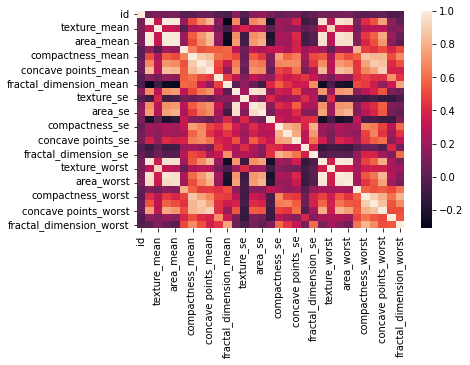

In [35]:
sns.heatmap(cancercor)

<AxesSubplot:xlabel='area_mean', ylabel='compactness_mean'>

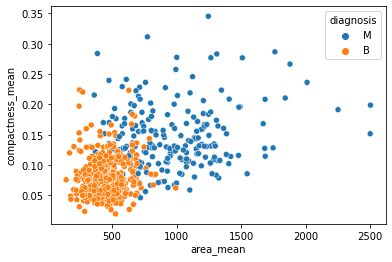

In [36]:
sns.scatterplot(x = 'area_mean', y = "compactness_mean", data = cancer, hue = 'diagnosis')

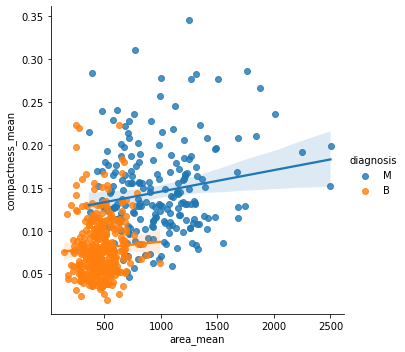

In [37]:
sns.lmplot(data = cancer, x = 'area_mean', y = 'compactness_mean', hue = 'diagnosis')